<a href="https://colab.research.google.com/github/atulkumarj/Mycode/blob/master/Liner_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [66]:
from google.colab import files
files.upload()


Saving area.csv to area.csv


{'area.csv': b'area\r\n1000\r\n1500\r\n2300\r\n3540\r\n4120\r\n4560\r\n5490\r\n3460\r\n4750\r\n2300\r\n9000\r\n8600\r\n7100'}

In [67]:
!ls

 area.csv  'HomePrice (1).csv'	 HomePrice.csv	 sample_data


In [16]:
df=pd.read_csv('HomePrice (1).csv')
df

,area,price
0,3000,565000
1,3200,610000
2,3600,680000
3,4000,725000
4,4000,725000


In [19]:
df.isnull().sum()

area      0
 price    0
dtype: int64

In [21]:
df.describe()

,area,price
count,5.00000,5.000000
mean,3560.00000,661000.000000
std,456.07017,71361.754463
min,3000.00000,565000.000000
25%,3200.00000,610000.000000
50%,3600.00000,680000.000000
75%,4000.00000,725000.000000
max,4000.00000,725000.000000


In [25]:
type(df)
df.keys()

Index(['area', ' price'], dtype='object')

In [37]:
df.shape
df.head(1)

,area,price
0,3000,565000


In [43]:
df = df.rename(columns={' price': 'price'})
df.keys()

Index(['area', 'price'], dtype='object')

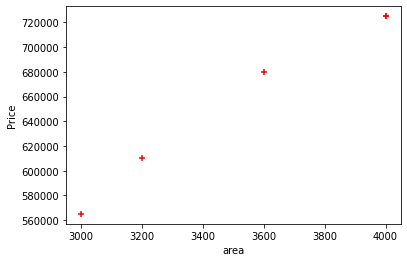

In [46]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('Price')
plt.scatter(df.area, df.price, color='Red', marker='+')


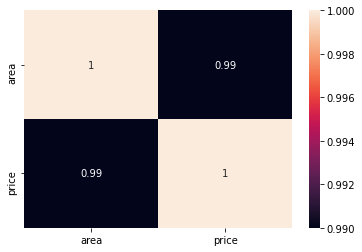

In [49]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [61]:
area=df.area
area=np.array(area).reshape(-1,1)
area

array([[3000],
       [3200],
       [3600],
       [4000],
       [4000]])

In [51]:
price=df.price
price

0    565000
1    610000
2    680000
3    725000
4    725000
Name: price, dtype: int64

In [62]:
lr=linear_model.LinearRegression()
lr.fit(area, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
lr.coef_

array([155.28846154])

In [65]:
lr.intercept_

108173.07692307665

In [68]:
are=pd.read_csv('area.csv')
are

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [70]:
price_pred=lr.predict(are)
price_pred

array([ 263461.53846154,  341105.76923077,  465336.53846154,
        657894.23076923,  747961.53846154,  816288.46153846,
        960706.73076923,  645471.15384615,  845793.26923077,
        465336.53846154, 1505769.23076923, 1443653.84615385,
       1210721.15384615])

In [71]:
are['price']=price_pred
are

,area,price
0,1000,2.634615e+05
1,1500,3.411058e+05
2,2300,4.653365e+05
3,3540,6.578942e+05
4,4120,7.479615e+05
5,4560,8.162885e+05
6,5490,9.607067e+05
7,3460,6.454712e+05
8,4750,8.457933e+05
9,2300,4.653365e+05


In [72]:
are.to_csv('FinalPrediction.csv')

In [73]:
!ls

 area.csv	      'HomePrice (1).csv'   sample_data
 FinalPrediction.csv   HomePrice.csv
